In [30]:
# I want to import ais_test.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import daytime as dt

""" Notes:
- help models with 360 degrees directions
- check for all nans
- Extracheck that port locations are congruent
"""

ais_test = pd.read_csv('ais_test.csv')
ais_test['time'] = pd.to_datetime(ais_test['time']).dt.tz_localize(None)
print(ais_test.shape)
ais_test.head()

(51739, 4)


,ID,vesselId,time,scaling_factor
0,0,61e9f3aeb937134a3c4bfe3d,2024-05-08 00:03:16,0.3
1,1,61e9f473b937134a3c4c02df,2024-05-08 00:06:17,0.3
2,2,61e9f469b937134a3c4c029b,2024-05-08 00:10:02,0.3
3,3,61e9f45bb937134a3c4c0221,2024-05-08 00:10:34,0.3
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3


In [43]:
ais_train = pd.read_csv('ais_train.csv', sep='|')
ais_train['time'] = pd.to_datetime(ais_train['time']).dt.tz_localize(None)
print(ais_train.shape)
ais_train.head(10)

(1522065, 11)


,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3
5,2024-01-01 00:05:13,186.9,0.0,0,187,5,12-20 02:40,24.27431,-110.32727,61e9f468b937134a3c4c028f,61d37ac11366c3998241da0a
6,2024-01-01 00:05:40,123.4,0.0,128,511,5,12-16 01:00,40.71466,29.46603,61e9f46bb937134a3c4c02b3,61d38259b7b7526e1adf3a41
7,2024-01-01 00:05:49,151.2,0.0,0,20,5,12-31 18:30,-19.25026,146.83507,61e9f3bfb937134a3c4bfe9f,61d36f6e0a1807568ff9a115
8,2024-01-01 00:06:18,265.0,0.1,0,122,1,12-30 19:00,-26.73068,153.29194,61e9f45bb937134a3c4c0221,61d36f640a1807568ff9a103
9,2024-01-01 00:06:29,36.0,0.0,0,70,5,12-30 19:55,35.46922,139.68343,61e9f3e6b937134a3c4bff6d,61d379f61366c3998241d8d2


'World map, so to speak'

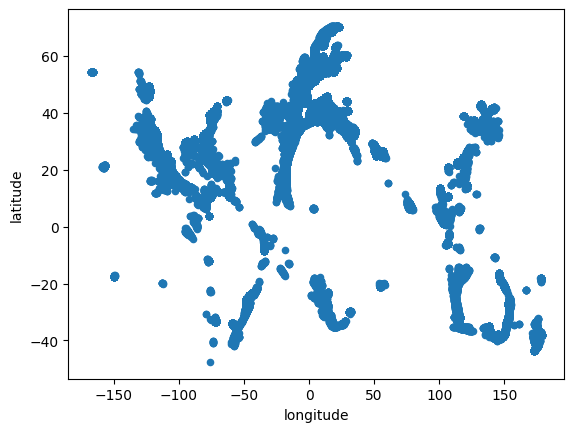

In [32]:
# Visualize vessel 61e9f3aeb937134a3c4bfe3d
ais_train.plot(x='longitude', y='latitude', kind='scatter')
"World map, so to speak"

In [33]:
schedules_to_may_2024 = pd.read_csv('schedules_to_may_2024.csv', sep='|')

schedules_to_may_2024['arrivalDate'] = pd.to_datetime(schedules_to_may_2024['arrivalDate']).dt.tz_localize(None)
schedules_to_may_2024['sailingDate'] = pd.to_datetime(schedules_to_may_2024['sailingDate']).dt.tz_localize(None)

print(schedules_to_may_2024.shape)
schedules_to_may_2024.head()

(136250, 9)


,vesselId,shippingLineId,shippingLineName,arrivalDate,sailingDate,portName,portId,portLatitude,portLongitude
0,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-02,2023-10-03,Port of Brunswick,61d38499b7b7526e1adf3d54,31.140556,-81.496667
1,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-27,2023-10-27,Port of Southampton,61d3832bb7b7526e1adf3b63,50.902500,-1.428889
2,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-19,2023-10-20,Port of Bremerhaven,61d375e793c6feb83e5eb3e2,53.563611,8.554722
3,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-09,2023-10-10,Port of New York,61d38481b7b7526e1adf3d23,40.688333,-74.028611
4,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-09-25,2023-09-26,Manzanillo International Terminal,61d37d0199db2ccf7339eee1,9.372370,-79.879790


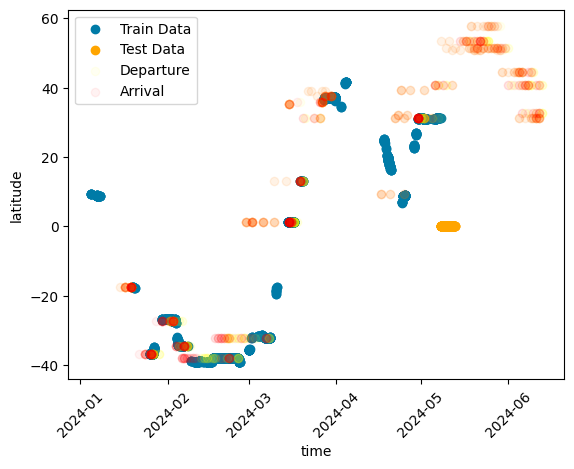

In [39]:
# Filter the same vessel entries in ais_train and ais_test
def plotVessel(vessel_id='61e9f3aeb937134a3c4bfe3d', feature='latitude'):
    train_vessel = ais_train[ais_train['vesselId'] == vessel_id]
    test_vessel = ais_test[ais_test['vesselId'] == vessel_id]
    schedule = schedules_to_may_2024[schedules_to_may_2024['vesselId'] == vessel_id]
    # remove entries from schedule that are earlier than the first entry in ais_train
    schedule = schedule[schedule['sailingDate'] > train_vessel['time'].min()]
    # remove entries from schedule that are more than 1 month-after than the last entry in ais_test
    schedule = schedule[schedule['arrivalDate'] < test_vessel['time'].max() + pd.DateOffset(months=1)]
    # Plot latitude vs time for ais_train as a scatter plot
    plt.scatter(train_vessel['time'], train_vessel[feature], label='Train Data', color='#007BA7')
    # Plot the dots at y=0 for ais_test time entries
    plt.scatter(test_vessel['time'], [0] * len(test_vessel), label='Test Data', color='orange')
    " Plot blue dots for the depature dates and dark bliue for the arrival dates"
    plt.scatter(schedule['sailingDate'], schedule['portLatitude'], label='Departure', color='yellow', alpha=0.05)
    # Semitransparent dots for the arrival dates
    plt.scatter(schedule['arrivalDate'], schedule['portLatitude'], label='Arrival', color='red', alpha=0.05)
    plt.xticks(rotation=45)
    plt.xlabel('time')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

plotVessel()
#plotVessel(feature='longitude')

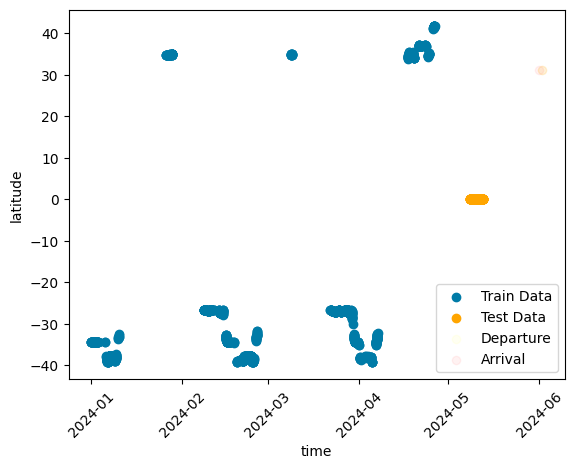

,vesselId,shippingLineId,shippingLineName,arrivalDate,sailingDate,portName,portId,portLatitude,portLongitude
4916,61e9f3b4b937134a3c4bfe77,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2024-06-22,2024-06-27,Port of Tacoma,61d38484b7b7526e1adf3d29,47.267222,-122.406667
4917,61e9f3b4b937134a3c4bfe77,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2024-07-01,2024-07-03,Port of Long Beach,61d3847fb7b7526e1adf3d1f,33.748889,-118.201111
4918,61e9f3b4b937134a3c4bfe77,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2024-06-01,2024-06-02,Shanghai,634c4de270937fc01c3a7132,31.233000,121.483000
37977,61e9f3b4b937134a3c4bfe77,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2024-06-02,2024-06-02,Shanghai,634c4de270937fc01c3a7132,31.233000,121.483000
37978,61e9f3b4b937134a3c4bfe77,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2024-06-20,2024-06-20,Port of Tacoma,61d38484b7b7526e1adf3d29,47.267222,-122.406667


In [40]:
plotVessel(vessel_id='61e9f3b4b937134a3c4bfe77')
#plotVessel(vessel_id='61e9f3b4b937134a3c4bfe77', feature='longitude')
schedules_to_may_2024[schedules_to_may_2024['vesselId'] == '61e9f3b4b937134a3c4bfe77'].head()

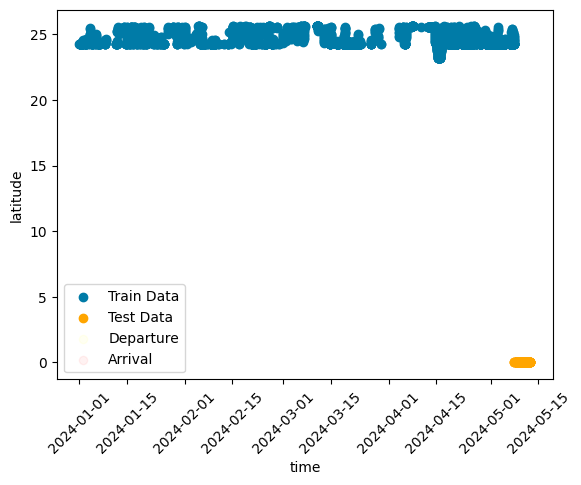

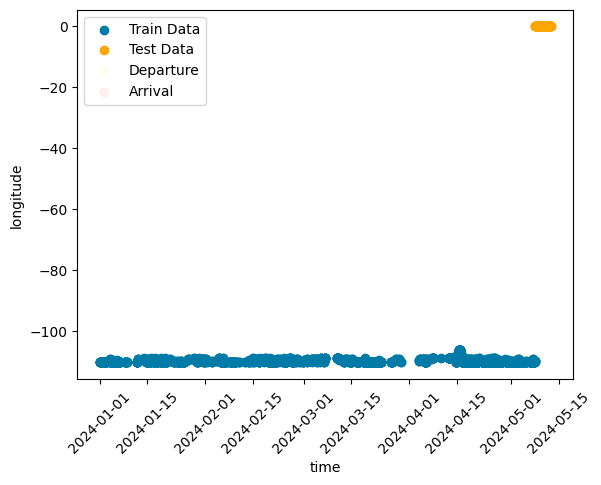

,vesselId,shippingLineId,shippingLineName,arrivalDate,sailingDate,portName,portId,portLatitude,portLongitude


In [45]:
plotVessel(vessel_id='61e9f468b937134a3c4c028f')
plotVessel(vessel_id='61e9f468b937134a3c4c028f', feature='longitude')
schedules_to_may_2024[schedules_to_may_2024['vesselId'] == '61e9f468b937134a3c4c028f'].head()